# Simple Scatter Plots

Otro tipo de gráfico que se utiliza con frecuencia es el gráfico de dispersión simple (simple scatter plot), un primo cercano del gráfico de líneas.
En lugar de unir los puntos mediante segmentos de línea, aquí los puntos se representan individualmente con un punto, un círculo u otra forma.

Comenzaremos configurando el cuaderno para trazar e importar las funciones que utilizaremos:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import numpy as np

In [11]:
import matplotlib
print(matplotlib.__version__)


3.9.2


## Scatter Plots with ``plt.plot``

En la sección anterior, analizamos ``plt.plot``/``ax.plot`` para generar gráficos de líneas.
Resulta que esta misma función también puede generar gráficos de dispersión:

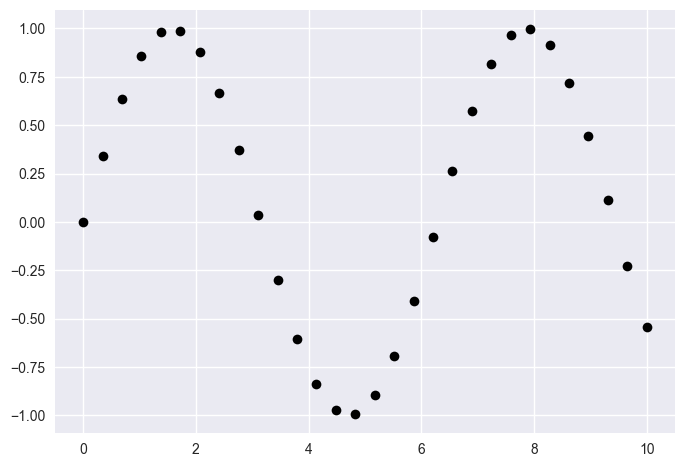

In [35]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');




El tercer argumento en la llamada de la función es un carácter que representa el tipo de símbolo utilizado para el gráfico. Así como se pueden especificar opciones como ``'-'``, ``'--'`` para controlar el estilo de línea, el estilo de marcador tiene su propio conjunto de códigos de cadena cortos. La lista completa de símbolos disponibles se puede ver en la documentación de ``plt.plot``, o en la [documentación en línea de Matplotlib](https://matplotlib.org/stable/api/markers_api.html). La mayoría de las posibilidades son bastante intuitivas, y aquí mostraremos algunas de las más comunes:

In [37]:
#para ver los marcadores disponibles
from matplotlib.markers import MarkerStyle
print(MarkerStyle.markers)

{'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', 'none': 'nothing', ' ': 'nothing', '': 'nothing'}


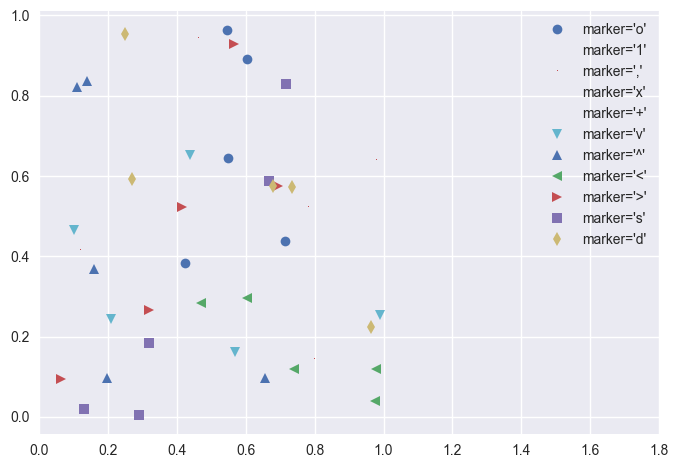

In [18]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Para obtener aún más posibilidades, estos códigos de caracteres se pueden utilizar junto con códigos de línea y color para trazar puntos a lo largo de una línea que los conecta:

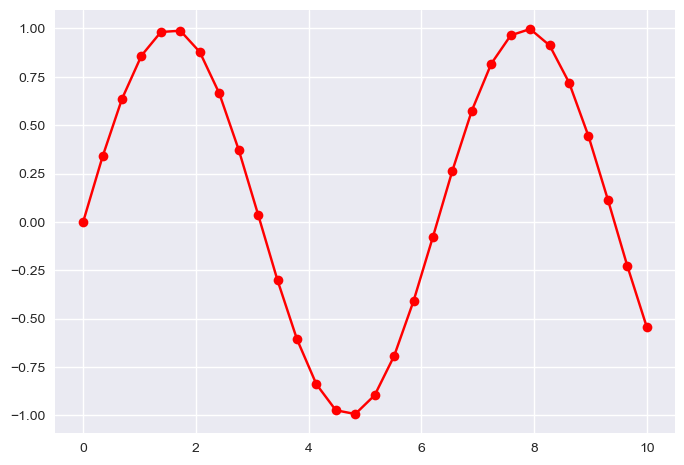

In [6]:
plt.plot(x, y, '-or');

Los argumentos de palabras clave adicionales a ``plt.plot`` especifican una amplia gama de propiedades de las líneas y marcadores:

(-1.2, 1.2)

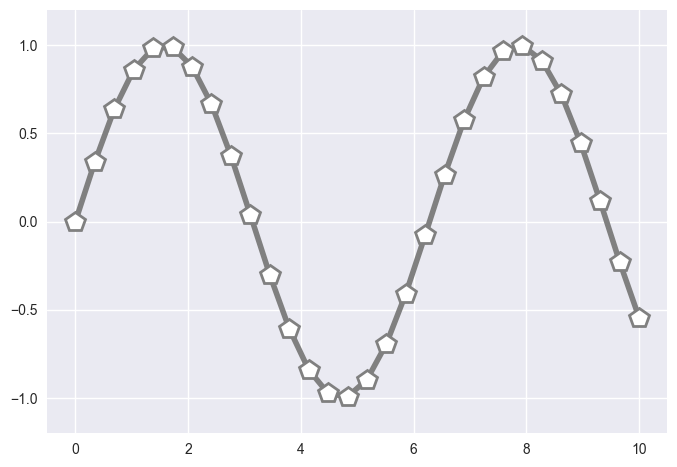

In [40]:
# Graficar y vs. x con una línea sólida ('-') y un marcador 'p' (forma de pentágono)
plt.plot(x, y, '-p', color='gray',  # Usar gris para el color de la línea

         # Establecer las propiedades del marcador
         markersize=15,  # Tamaño de cada marcador de pentágono
         linewidth=4,  # Ancho de la línea que conecta los puntos

         # Personalizar la apariencia del marcador
         markerfacecolor='white',  # Relleno blanco dentro de cada marcador
         markeredgecolor='gray',  # Color de contorno gris de los marcadores
         markeredgewidth=2)  # Ancho del borde del marcador

# Establecer los límites del eje 'y' para mantener el gráfico a la vista
plt.ylim(-1.2, 1.2)


Este tipo de flexibilidad en la función ``plt.plot`` permite una amplia variedad de posibles opciones de visualización.
Para obtener una descripción completa de las opciones disponibles, consulte la [documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) de ``plt.plot``.

## Scatter Plots with ``plt.scatter``

Un segundo método más potente para crear gráficos de dispersión es la función ``plt.scatter``, que se puede utilizar de forma muy similar a la función ``plt.plot``:

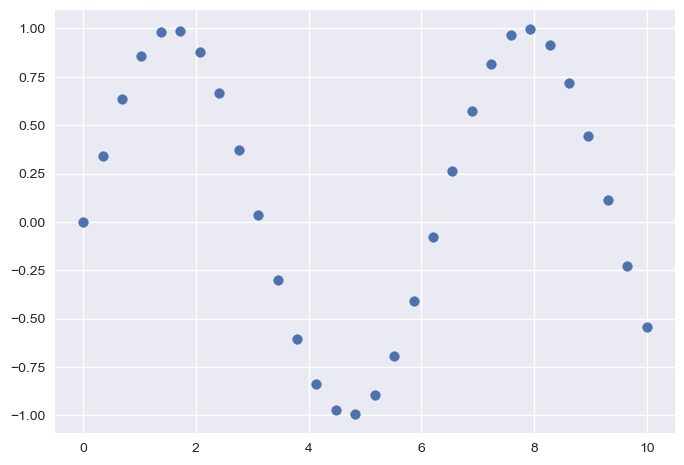

In [13]:
plt.scatter(x, y, marker='o');

La principal diferencia entre ``plt.scatter`` y ``plt.plot`` es que se puede utilizar para crear gráficos de dispersión en los que las propiedades de cada punto individual (tamaño, color de la cara, color del borde, etc.) se pueden controlar individualmente o asignar a los datos.

Demostremos esto creando un gráfico de dispersión aleatorio con puntos de muchos colores y tamaños.
Para ver mejor los resultados superpuestos, también utilizaremos la palabra clave ``alpha`` para ajustar el nivel de transparencia:

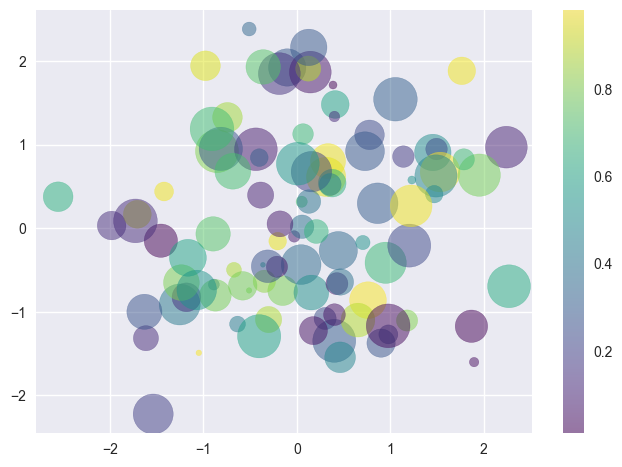

In [44]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100) # ["A","B","A"]
sizes = 1000 * rng.rand(100)

# Crea un diagrama de dispersión con los puntos x e y
# c=colors asigna el color de cada punto a un valor en `colors`
# s=sizes escala el tamaño de cada punto según la matriz `sizes`
# alpha=0.5 establece el nivel de transparencia para cada punto
# cmap='viridis' aplica el mapa de colores 'viridis' para asignar valores numéricos de color a un gradiente de color
plt.scatter(x, y, c=colors, s=sizes, alpha=.5,
            cmap='viridis')
plt.colorbar();  # mostrar escala de colores

Observe que el argumento de color se asigna automáticamente a una escala de color (mostrada aquí por el comando ``colorbar()``), y que el argumento de tamaño se proporciona en píxeles.
De esta manera, el color y el tamaño de los puntos se pueden utilizar para transmitir información en la visualización, con el fin de visualizar datos multidimensionales.

Por ejemplo, podríamos utilizar los datos de Iris de Scikit-Learn, donde cada muestra es uno de los tres tipos de flores a las que se les ha medido cuidadosamente el tamaño de sus pétalos y sépalos:

```bash
!conda install -c conda-forge scikit-learn -y
```
or
```bash
!pip install scikit-learn 
```


Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


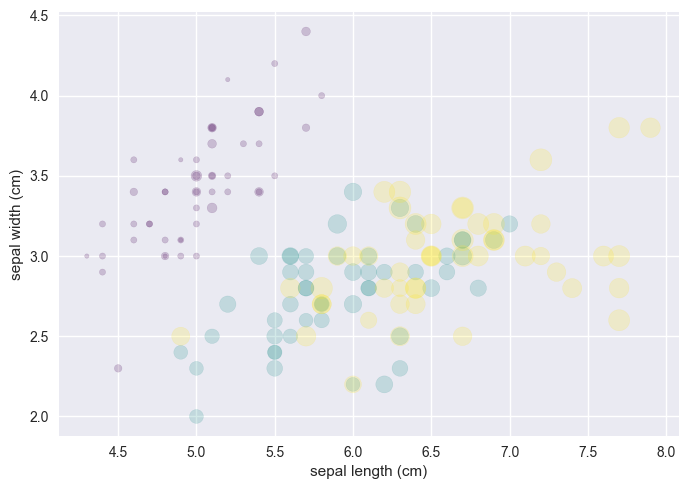

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
print(f'Iris feature names: {iris.feature_names}')

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Podemos ver que este diagrama de dispersión nos ha dado la capacidad de explorar simultáneamente cuatro dimensiones diferentes de los datos:
la ubicación (x, y) de cada punto corresponde a la longitud y el ancho del sépalo, el tamaño del punto está relacionado con el ancho del pétalo y el color está relacionado con la especie particular de flor.
Los diagramas de dispersión multicolores y con múltiples características como este pueden ser útiles tanto para la exploración como para la presentación de datos.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aparte de las diferentes características disponibles en ``plt.plot`` y ``plt.scatter``, ¿por qué elegiría utilizar uno en lugar del otro? Si bien no importa tanto para pequeñas cantidades de datos, a medida que los conjuntos de datos se hacen más grandes que unos pocos miles de puntos, ``plt.plot`` puede ser notablemente más eficiente que ``plt.scatter``.
La razón es que ``plt.scatter`` tiene la capacidad de representar un tamaño y/o color diferente para cada punto, por lo que el renderizador debe hacer el trabajo adicional de construir cada punto individualmente.
En ``plt.plot``, por otro lado, los puntos son siempre esencialmente clones entre sí, por lo que el trabajo de determinar la apariencia de los puntos se realiza solo una vez para todo el conjunto de datos. Para conjuntos de datos grandes, la diferencia entre estos dos puede generar un rendimiento muy diferente y, por este motivo, se debería preferir ``plt.plot`` sobre ``plt.scatter`` para conjuntos de datos grandes.